In [1]:
# jupyter-notebook V0_1_1.ipynb --port 8888 --ip 192.168.1.5

import cv2
import os
import numpy as np
from collections import Counter
import itertools  
from collections import defaultdict
import time
import numba as nb
import copy
from os import listdir, mkdir
from os.path import isfile, isdir, join
from tqdm import tqdm_notebook

from components_container import ComponentsContainer

%matplotlib inline

In [2]:
# filter all noise using minimum size threshold
BACKGROUND_INTENSITY_THRESHOLD = 20
MIN_AXON_SIZE = 20

# merging close components based on centroids and contour distance
PREMERGE_CENTROIDS_DISTANCE_T  = 200
PREMERGE_CONTOUR_DISTANCE_T = 15

#splitting nucleus and axons based on size
MIN_NUCLEUS_SIZE = 150

#grouping possible axons to nucleus
CENTROIDS_DISTANCE_T = 90
CONTOUR_DISTANCE_T = 25

LOADPATH = '../raw_pics'
SAVEPATH = '../info'
FORMAT = '.bmp'
RECURSIVE = True

In [3]:
def mirror_dir_for_save(loadpath):
    try:
        mkdir(loadpath.replace(LOADPATH, SAVEPATH))
    except(OSError):
        pass
    
def process_dir(loadpath):
    mirror_dir_for_save(loadpath)
    object_names_in_folder = listdir(loadpath)
    print ("start processing folder {} pics: {}".format(loadpath, str(len(object_names_in_folder))))
    for f in tqdm_notebook(object_names_in_folder):
        local_object = join(loadpath, f)

        if isfile(local_object) and f[0] != '.':
            process_pic(join(loadpath, f))
            continue

        if RECURSIVE and isdir(join(loadpath, f)):
            process_dir(join(loadpath, f))
            continue

def process_pic(path):
    starttime = time.time()
    print("processing pic {} ... ".format(path), end = "")
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray, BACKGROUND_INTENSITY_THRESHOLD, 400, cv2.THRESH_BINARY)
    container = ComponentsContainer(binary, MIN_AXON_SIZE)
    container.merge_components_closer_than(PREMERGE_CENTROIDS_DISTANCE_T, PREMERGE_CONTOUR_DISTANCE_T)
    container.recalc_edge_and_size_info()    
    container.split_nucl_axon(MIN_NUCLEUS_SIZE)
    container.add_hull_info_to_nucleus()
    container.group_axons_to_nucleus(CENTROIDS_DISTANCE_T, CONTOUR_DISTANCE_T)
    with open(path.replace(LOADPATH, SAVEPATH).replace(FORMAT, ".txt"), "w") as f:
        write_info_from_container(container, f)
    save_pic_from_container(container,img, path.replace(LOADPATH, SAVEPATH).replace(FORMAT, "_processed.png"))
    print('done in {} sec.'.format(time.time() - starttime))


def write_info_from_container(container, f):
    labs = sorted(container.nucleus_labs, key = lambda x: -container.components_index.get(x).size)
    f.write("#, Size, HullSize, Perimeter\n")
    i = 0
    for nucl_lab in labs:
        i +=1
        nucl = container.components_index.get(nucl_lab)
        f.write("{:2}, {:4}, {:4}, {:4}\n".format(i, nucl.size, nucl.hull_size, len(nucl.edge)))
        
def save_pic_from_container(container,img, savepath):
    pic = enhance_img_with_container(img, container)
    cv2.imwrite(savepath,pic)
    
def enhance_img_with_container(img, container):
    edge_color = [200,200,0]
    hull_color = [200,200,200]
    for nucl_lab in container.nucleus_labs:           
        hull = np.array(container.components_index.get(nucl_lab).hull, np.int32)
        hull.reshape((-1,1,2))
        hull = hull[:,::-1]
        cv2.polylines(img, [hull],True, hull_color)

        for ed in container.components_index.get(nucl_lab).edge:
            img[ed[0], ed[1]] = edge_color
    return img

In [4]:
#LOADPATH = '../raw_pics/hippo/с4_6_73'
process_dir(LOADPATH)

start processing folder ../raw_pics pics: 3


processing pic ../raw_pics/t.bmp ... done in 6.692409038543701 sec.
start processing folder ../raw_pics/mic pics: 5


start processing folder ../raw_pics/mic/®≠‚ pics: 5


processing pic ../raw_pics/mic/®≠‚/int_2_29_z4.bmp ... done in 3.2808139324188232 sec.
processing pic ../raw_pics/mic/®≠‚/56_int_iba_cortex_5z.bmp ... done in 3.2081170082092285 sec.
processing pic ../raw_pics/mic/®≠‚/56_int_iba_cortex_left_3z.bmp ... done in 3.9563450813293457 sec.
processing pic ../raw_pics/mic/®≠‚/int74_iba_cortex_04z.bmp ... done in 3.124133825302124 sec.
processing pic ../raw_pics/mic/®≠‚/int_2_29_left_z4.bmp ... done in 3.171689033508301 sec.
start processing folder ../raw_pics/mic/Ø‡ÆØ„·‚®´† pics: 8


processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/k10_4_7_z3_left.bmp ... done in 5.991887092590332 sec.
processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/k10_4_7_z2_left.bmp ... done in 5.246365308761597 sec.
processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/k10_4_7_z4_left.bmp ... done in 4.845431089401245 sec.
processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/c4_7_19_z1.bmp ... done in 3.2946081161499023 sec.
processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/k10_4_7_z1_left.bmp ... done in 6.301081895828247 sec.
processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/k10_4_7_z1.bmp ... done in 7.26819920539856 sec.
processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/k10_4_7_z3.bmp ... done in 4.806024074554443 sec.
processing pic ../raw_pics/mic/Ø‡ÆØ„·‚®´†/k10_4_7_z2.bmp ... done in 8.176453113555908 sec.
start processing folder ../raw_pics/mic/4 §•≠Ï pics: 8


processing pic ../raw_pics/mic/4 §•≠Ï/c4-_06_73_iba_left_cortex_4z.bmp ... done in 4.7629101276397705 sec.
processing pic ../raw_pics/mic/4 §•≠Ï/·4_7_19__left_z4.bmp ... done in 4.843962907791138 sec.
processing pic ../raw_pics/mic/4 §•≠Ï/k4_01_19_05z.bmp ... done in 5.522763013839722 sec.
processing pic ../raw_pics/mic/4 §•≠Ï/c4-ba-cortex_4z.bmp ... done in 4.105391979217529 sec.
processing pic ../raw_pics/mic/4 §•≠Ï/·4_7_19_z4.bmp ... done in 3.7690329551696777 sec.
processing pic ../raw_pics/mic/4 §•≠Ï/k4_01_19_-ba-cortex_left_4z.bmp ... done in 4.638715028762817 sec.
processing pic ../raw_pics/mic/4 §•≠Ï/c4-_06_73_ba-cortex_4z.bmp ... done in 4.19585108757019 sec.
processing pic ../raw_pics/mic/4 §•≠Ï/k4_cortex_5_59_03.bmp ... done in 4.86192512512207 sec.
start processing folder ../raw_pics/mic/10 §•≠Ï pics: 8


processing pic ../raw_pics/mic/10 §•≠Ï/k10-3-10_ssc_left_4.bmp ... done in 4.086129188537598 sec.
processing pic ../raw_pics/mic/10 §•≠Ï/k10-3-10_ssc-4.bmp ... done in 4.2251060009002686 sec.
processing pic ../raw_pics/mic/10 §•≠Ï/c10-1-36-ssc-left_5.bmp ... done in 3.9894490242004395 sec.
processing pic ../raw_pics/mic/10 §•≠Ï/c10_1_2_13_left_z3.bmp ... done in 4.494156837463379 sec.
processing pic ../raw_pics/mic/10 §•≠Ï/c10-1-36-ssc-4.bmp ... done in 4.393156051635742 sec.
processing pic ../raw_pics/mic/10 §•≠Ï/k10-2-20-ssc-left-4.bmp ... done in 4.55355978012085 sec.
processing pic ../raw_pics/mic/10 §•≠Ï/k10_4_7_z3.bmp ... done in 5.593055009841919 sec.
processing pic ../raw_pics/mic/10 §•≠Ï/k10-2-20-ssc-3.bmp ... done in 7.159821033477783 sec.



In [39]:
# testing
from matplotlib import pyplot as plt
img = cv2.imread('../raw_pics/71.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
r = gray.ravel()

r = r[r>15]

(array([319292., 133758., 113076.,  62331.,  54441.,  38022.,  26760.,
         16088.,  15276.,   9549.,  11279.,   7186.,   4837.,   5159.,
          3529.,   4547.,   2644.,   2900.,   2088.,   2434.,   2273.,
          2021.,   1459.,   1695.,   1586.,   1442.,   1350.,   1040.,
          1310.,    900.,   1341.,    900.,   1019.,    752.,    961.,
          1069.,    669.,    732.,    630.,    757.,    723.,    648.,
           514.,    632.,    476.,    599.,    427.,    497.,    474.,
          6605.]),
 array([ 16. ,  20.2,  24.4,  28.6,  32.8,  37. ,  41.2,  45.4,  49.6,
         53.8,  58. ,  62.2,  66.4,  70.6,  74.8,  79. ,  83.2,  87.4,
         91.6,  95.8, 100. , 104.2, 108.4, 112.6, 116.8, 121. , 125.2,
        129.4, 133.6, 137.8, 142. , 146.2, 150.4, 154.6, 158.8, 163. ,
        167.2, 171.4, 175.6, 179.8, 184. , 188.2, 192.4, 196.6, 200.8,
        205. , 209.2, 213.4, 217.6, 221.8, 226. ]),
 <a list of 50 Patch objects>)

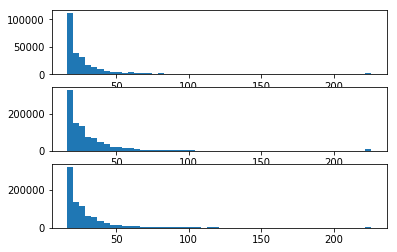

In [40]:
plt.subplot(3,1,1)
plt.hist(r, bins = 50)
img = cv2.imread('../raw_pics/49.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
r = gray.ravel()

r = r[r>15]
plt.subplot(3,1,2)
plt.hist(r, bins = 50)
img = cv2.imread('../raw_pics/33.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
r = gray.ravel()

r = r[r>15]
plt.subplot(3,1,3)
plt.hist(r, bins = 50)

In [22]:
pic = enhance_img_with_container(img, container)
cv2.imwrite('../test.png',pic)


True